In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Sarin\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
# Load the data
data = pd.read_csv("cell_samples.csv")

In [3]:
# Display the data
data

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


In [4]:
# Drop the 'ID' column
data.drop("ID", axis=1, inplace=True)

In [5]:
# Check information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Clump        699 non-null    int64 
 1   UnifSize     699 non-null    int64 
 2   UnifShape    699 non-null    int64 
 3   MargAdh      699 non-null    int64 
 4   SingEpiSize  699 non-null    int64 
 5   BareNuc      699 non-null    object
 6   BlandChrom   699 non-null    int64 
 7   NormNucl     699 non-null    int64 
 8   Mit          699 non-null    int64 
 9   Class        699 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 54.7+ KB


In [6]:
# Find unique values in 'BareNuc'
set(data['BareNuc'])

{'1', '10', '2', '3', '4', '5', '6', '7', '8', '9', '?'}

In [7]:
# Find rows with "?" in 'BareNuc'
row_with_questionmark = data[data['BareNuc'] == "?"].index

In [8]:
# Drop rows with "?" in 'BareNuc'
data.drop(row_with_questionmark, axis=0, inplace=True)

In [9]:
# Convert 'BareNuc' to float
data['BareNuc'] = data['BareNuc'].astype('float')

In [10]:
# Separate features and target variable
x = data.drop('Class', axis=1)
y = data['Class']

In [11]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2)

In [12]:
# Import the Support Vector Classifier
from sklearn.svm import SVC

In [13]:
# Initialize and train the SVC model
clf = SVC()
clf.fit(xtrain, ytrain)

SVC()

In [14]:
# Predict on the testing set
ypred = clf.predict(xtest)

In [15]:
# Evaluate the model
from sklearn.metrics import accuracy_score, confusion_matrix, r2_score

In [16]:
# Calculate accuracy score
print("\naccuracy_score :", accuracy_score(ypred, ytest))


accuracy_score : 0.9635036496350365


In [17]:
# Calculate R2 score
print("\nr2_score :", r2_score(ypred, ytest))


r2_score : 0.8517316017316017


In [18]:
# Confusion matrix
conf_matrix = confusion_matrix(ytest, ypred)
print("\nConfusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[74  2]
 [ 3 58]]


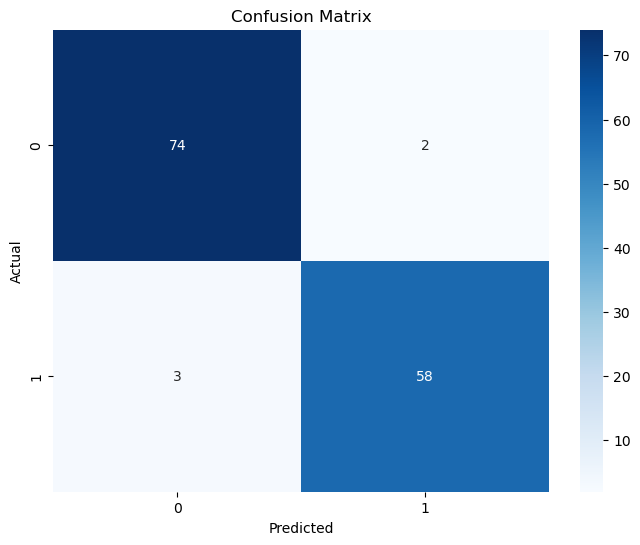

In [19]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [20]:
# Use a radial basis function (RBF) kernel for SVC
clf = SVC(kernel='rbf')
clf.fit(xtrain, ytrain)
ypred = clf.predict(xtest)

In [21]:
# Calculate accuracy score with RBF kernel
print("\naccuracy_score (RBF Kernel):", accuracy_score(ypred, ytest))


accuracy_score (RBF Kernel): 0.9635036496350365


In [22]:
# Calculate R2 score with RBF kernel
print("\nr2_score (RBF Kernel):", r2_score(ypred, ytest))


r2_score (RBF Kernel): 0.8517316017316017


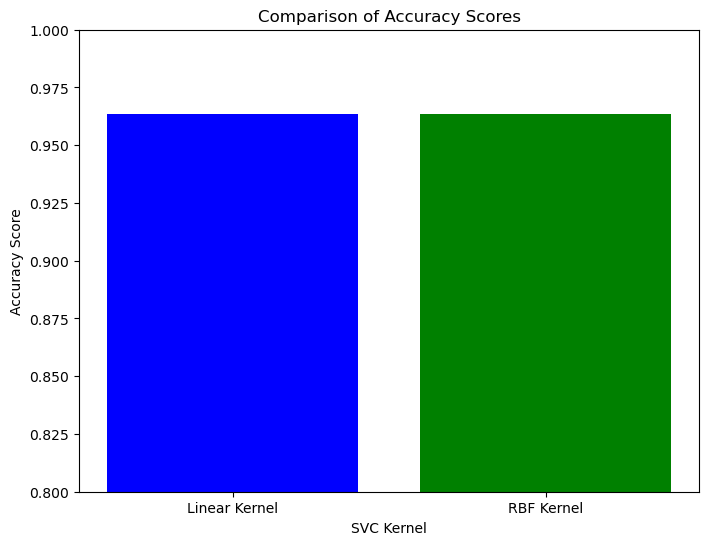

In [23]:
import matplotlib.pyplot as plt

# Accuracy scores
accuracy_scores = [accuracy_score(ypred, ytest), accuracy_score(clf.predict(xtest), ytest)]
models = ['Linear Kernel', 'RBF Kernel']

# Plotting the bar graph
plt.figure(figsize=(8, 6))
plt.bar(models, accuracy_scores, color=['blue', 'green'])
plt.xlabel('SVC Kernel')
plt.ylabel('Accuracy Score')
plt.title('Comparison of Accuracy Scores')
plt.ylim(0.8, 1.0)  # Set y-axis limits for better visualization
plt.show()


### Summary
Data Preprocessing: We cleaned the dataset by removing irrelevant columns and handling missing values to ensure accurate analysis.

Model Training: We split the data into training and testing sets, then trained two SVM models with different kernels: linear and radial basis function (RBF).

Evaluation: We evaluated the performance of both models using metrics such as accuracy score, R2 score, and confusion matrix to assess their effectiveness in cancer detection